# Aula 07.3 - Descritores de imagens

# MBA em Ciência de Dados
## Técnicas Avançadas de Captura e Tratamento de Dados


### <span style="color:darkred">Módulo VII - Dados não estruturados: sinais e imagens</span>


### <span style="color:darkred">Descritores de imagens</span>

Material Produzido por Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

__Conteúdo:__
1. Características de cor baseadas em histograma
2. Características de textura por padrões binários locais

***

Existem centenas de *descritores de imagens*. Os clássicos relacionam aspectos visuais que podemos decrever como humanos. Entre outros:

* cor
* textura
* forma
* gradiente

Descritores simples podem ser muito úteis para recuperação de imagens baseada em conteúdo por meio de *engenharia de características*

Atualmente, Deep Learning (a ser visto futuramente no curso) é considerado o estado da arte para esse tipo de análise, mas suas características possuem baixo nível de interpretação.

Veremos dois exemplos de descritores interpretáveis e que podem ser úteis para propósito geral e como base para construir soluções mais complexas.

## Características de cor




Imagens possuem sua cor codificada em:

* **tons de cinza / intensidades**: 1 canal de cor com 8 bits por pixel
     * 16 em alguns casos, como o de imagens médicas
     
     
* **coloridas**: RGB, com 3 canais de cor com 8 bits cada (total 24 bits)
    * também podem ser codificadas em outros espaços de cores, como HSV (Hue, Saturation, Value), Lab, Luv, entre outros.

--- 
O descritor de cor (ou intensidade) mais simples é o **histograma global de cores**.

Vamos usar como exemplo um caso anterior que vimos na primeira aula!

Text(0.5, 1.0, 'Rank 2 : 8021.9')

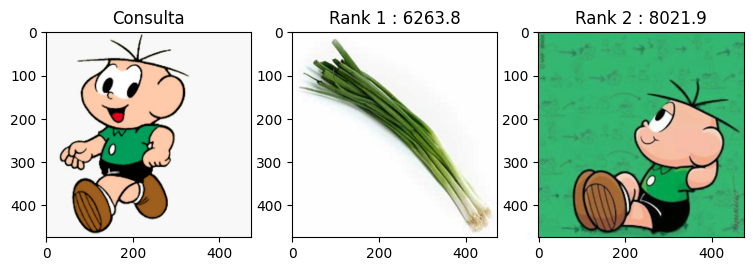

In [1]:
import imageio.v2 as imageio
import numpy as np
import matplotlib.pyplot as plt

# carregar e exibir imagens da "base de dados"
img1 = imageio.imread("dados/cebolinha3.jpg")
img2 = imageio.imread("dados/cebolinha2.jpg")

# carregar imagem de consulta e codificar funcao de distancia
# computar as distancias e exibir
imgQ = imageio.imread("dados/cebolinha1.jpg")

def Euclidean_distance(A, B):
    """ Calcula a distancia Euclidiana entre dois vetores de mesmo tamanho"""
    return  np.sqrt( np.sum((A-B)**2) )

dQ1 = Euclidean_distance(imgQ, img1)
dQ2 = Euclidean_distance(imgQ, img2)

plt.figure(figsize=(9,3))
plt.subplot(131); plt.imshow(imgQ); plt.title('Consulta')
plt.subplot(132); plt.imshow(img1); plt.title('Rank 1 : %.1f' % dQ1)
plt.subplot(133); plt.imshow(img2); plt.title('Rank 2 : %.1f' % dQ2)

In [2]:
def histograma_global(img, bins):

    # um único canal de cor
    if (len(img.shape) == 2):
        hist,_ = np.histogram(img, bins=bins)
    # mais do que um canal de cor RGB
    if (len(img.shape) == 3):
        hist_R,_ = np.histogram(img[:,:,0], bins=bins)
        hist_G,_ = np.histogram(img[:,:,1], bins=bins)
        hist_B,_ = np.histogram(img[:,:,2], bins=bins)
        
        hist = np.concatenate([hist_R, hist_G, hist_B])
    
    # normaliza o vetor resultante pela soma dos valores
    hist = hist.astype("float")
    hist /= (hist.sum() + 0.0001)        
    
    return hist

Text(0.5, 1.0, 'Rank 2: 0.4683')

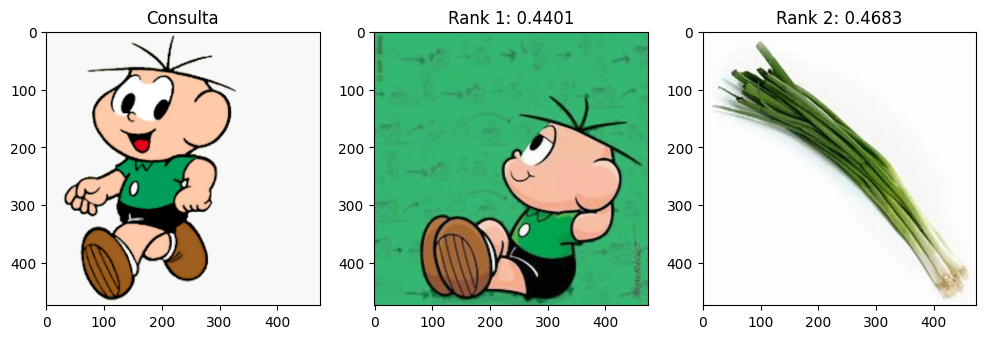

In [3]:
HQ = histograma_global(imgQ, 64)
H1 = histograma_global(img1, 64)
H2 = histograma_global(img2, 64)

dQ1_H = Euclidean_distance(HQ, H1)
dQ2_H = Euclidean_distance(HQ, H2)

plt.figure(figsize=(12,4))
plt.subplot(131); plt.imshow(imgQ); plt.title('Consulta')
plt.subplot(132); plt.imshow(img2); plt.title('Rank 1: %.4f' % dQ2_H)
plt.subplot(133); plt.imshow(img1); plt.title('Rank 2: %.4f' % dQ1_H)

#### vantagens em utilizar descritores:
* vetores de característica possuem menor dimensão do que o espaço de pixels e podem ser usados como índices,
* imagens de resolução diferentes podem ser comparadas, 
* é possível aplicar redução de dimensionalidade


In [4]:
print("Dimensionalidade pixels = ", np.product(imgQ.shape))
print("Dimensionalidade histograma = ", np.product(HQ.shape))

Dimensionalidade pixels =  674028
Dimensionalidade histograma =  192


In [5]:
img3 = imageio.imread("dados/magali.jpg")
print("Dimensionalidade pixels = ", np.product(img3.shape))

#dQ3 = Euclidean_distance(imgQ, img3)

Dimensionalidade pixels =  923520


In [6]:
from skimage.transform import resize

imgQ_shape = imgQ.shape  # Obtem a forma da imagem 'imgQ'

img3_resized = resize(img3, imgQ_shape)  # Redimensiona 'img3' para ter o mesmo formato de 'imgQ'

print("Dimensionalidade pixels = ", np.product(img3_resized.shape))

dQ3 = Euclidean_distance(imgQ, img3_resized)  # Agora você pode calcular a distância Euclidiana
print(dQ3)

Dimensionalidade pixels =  674028
181973.0906349875


O erro é de incompatibilidade nos tamanhos das imagens, de forma que diferentes resoluções não permita comparação direta.

Text(0.5, 1.0, 'Rank 2 : 0.4683')

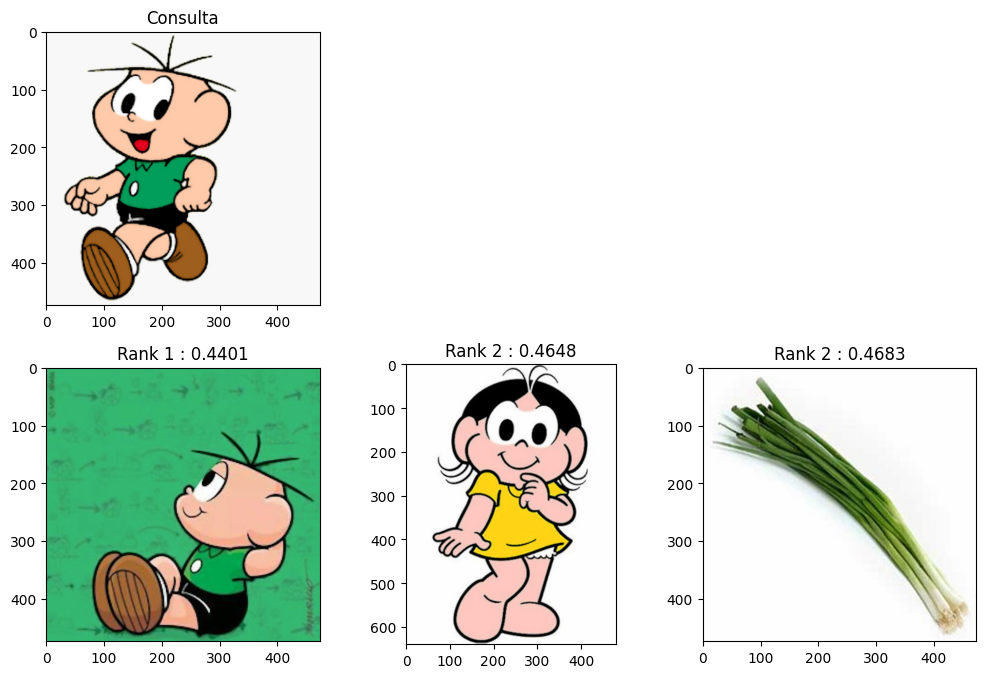

In [7]:
H3 = histograma_global(img3, 64)
dQ3_H = Euclidean_distance(HQ, H3)

plt.figure(figsize=(12,8))
plt.subplot(231); plt.imshow(imgQ); plt.title('Consulta')
plt.subplot(234); plt.imshow(img2); plt.title('Rank 1 : %.4f' % dQ2_H)
plt.subplot(235); plt.imshow(img3); plt.title('Rank 2 : %.4f' % dQ3_H)
plt.subplot(236); plt.imshow(img1); plt.title('Rank 2 : %.4f' % dQ1_H)

#### outros descritores de cor
* Border/Interior Classification (BIC): computa dois histogramas um para regiões planas (interior) e um para bordas ou regiões com variação (border)


* Autocorrelograma de cores: computa uma matriz que verifica a ocorrência de uma cor em relação às outras

---
### Características de textura

Consideram não apenas os valores absolutos dos pixels, mas também sua relação com vizinhos.
* regiões planas tem significado diferente de regiões com alta variação
* diferentes padrões de variação possuem significado diferente de textura

| Textura | Exemplo | Textura | Exemplo
|:---:|:---:|:---:|:---:|
| Entrelaçado | ![Entrelaçado](dados/texture_interlaced.jpg)|  Borbulhante | ![Borbulhante](dados/texture_bubbly.jpg)|
| Espargido | ![Polvilhado](dados/texture_sprinkled.jpg)| Pontilhado | ![Pontuado](dados/texture_dotted2.jpg)|
| Trançado | ![Trançado](dados/texture_braided.jpg)| Xadrez | ![Xadrez](dados/texture_chequered.jpg)|
    


Ainda que características de *frequência* possam ser utilizadas nesse caso, a Tranformada de Fourier não permite a localização das frequências, atuando apenas de forma global.

Um descritor bastante utilizado é o **Local Binary Patterns (LBP)**, implementado na biblioteca `scikit-image`

Ele busca por padrões locais em que cada pixel central é comparado com os vizinhos de forma binária:
* valores maiores o iguais se transformam em 1
* valores menores se transformam em 0

<img src="imagens/LBP.png" width=460></img>

Considerando uma vizinhança de 8 pixels, temos $2^8 = 256$ códigos distintos, dos quais obtemos um histograma

In [8]:
from skimage import feature

def lbp_features(img):
    
    # LBP opera em imagens de um só canal, aqui vamos converter 
    # RGB para escala de cinza usando o método Luminance
    img_gray = img[:,:,0].astype(float)*0.3 + img[:,:,1].astype(float)*0.59 + img[:,:,2].astype(float)*0.11
    
    # aqui definimos o numero de pontos e o raio, padrao = 8, 1
    lbp = feature.local_binary_pattern(img_gray.astype(np.uint8), 8, 1, method="uniform")
    
    # lbp retorna um matriz com os códigos, então devemos extraír o histograma
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, 8 + 3), range=(0, 8 + 2))

    # normaliza o histograma
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    # return the histogram of Local Binary Patterns

    return hist

Text(0.5, 1.0, 'Rank 5 : 0.2586')

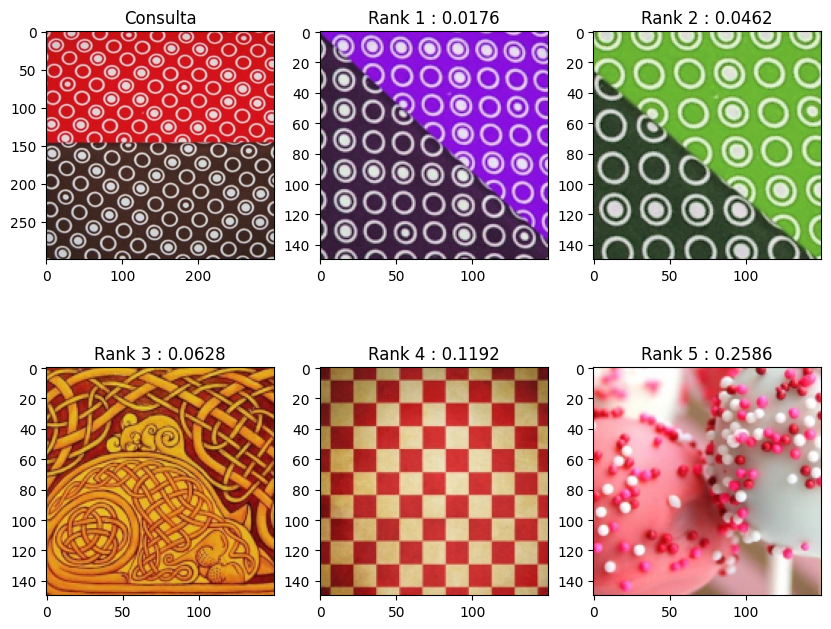

In [9]:
img1 = imageio.imread("dados/texture_dotted.jpg")
img2 = imageio.imread("dados/texture_dotted3.jpg")
img3 = imageio.imread("dados/texture_dotted2.jpg")
img4 = imageio.imread("dados/texture_interlaced.jpg")
img5 = imageio.imread("dados/texture_chequered.jpg")
img6 = imageio.imread("dados/texture_sprinkled.jpg")

lbp1 = lbp_features(img1)
lbp2 = lbp_features(img2)
lbp3 = lbp_features(img3)
lbp4 = lbp_features(img4)
lbp5 = lbp_features(img5)
lbp6 = lbp_features(img6)

dQ2_H = Euclidean_distance(lbp1, lbp2)
dQ3_H = Euclidean_distance(lbp1, lbp3)
dQ4_H = Euclidean_distance(lbp1, lbp4)
dQ5_H = Euclidean_distance(lbp1, lbp5)
dQ6_H = Euclidean_distance(lbp1, lbp6)

plt.figure(figsize=(10,8))
plt.subplot(231); plt.imshow(img1); plt.title('Consulta')
plt.subplot(232); plt.imshow(img2); plt.title('Rank 1 : %.4f' % dQ2_H)
plt.subplot(233); plt.imshow(img3); plt.title('Rank 2 : %.4f' % dQ3_H)
plt.subplot(234); plt.imshow(img4); plt.title('Rank 3 : %.4f' % dQ4_H)
plt.subplot(235); plt.imshow(img5); plt.title('Rank 4 : %.4f' % dQ5_H)
plt.subplot(236); plt.imshow(img6); plt.title('Rank 5 : %.4f' % dQ6_H)

(-0.8900000000000001, 9.89, 0.0, 0.3422533333181221)

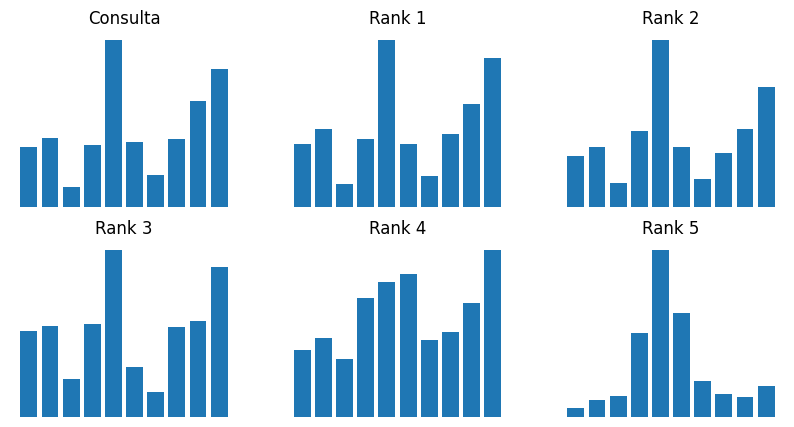

In [10]:

vals = range(len(lbp1))
plt.figure(figsize=(10,5))
plt.subplot(231); plt.bar(vals,lbp1); 
plt.title('Consulta'); plt.axis('off')
plt.subplot(232); plt.bar(vals,lbp2); 
plt.title('Rank 1'); plt.axis('off')
plt.subplot(233); plt.bar(vals,lbp3); 
plt.title('Rank 2'); plt.axis('off')
plt.subplot(234); plt.bar(vals,lbp4); 
plt.title('Rank 3'); plt.axis('off')
plt.subplot(235); plt.bar(vals,lbp5); 
plt.title('Rank 4'); plt.axis('off')
plt.subplot(236); plt.bar(vals,lbp6); 
plt.title('Rank 5'); plt.axis('off')


---
### Outros descritores de imagens

* HoG - histogram of oriented gradients
    * usados em reconhecimento de pessoas e objetos

* Haar-like features
    * usados em detecção facial
    
* SIFT - scale-invariant feature transform
    * foi por um bom tempo estado-da-arte, posteriormente patenteado mas há similares como o DAISY
        
* BRIEF - descritor binário local
    * também similar ao SIFT, mas binário e utilizado para matching de regiões em imagens
    
* Gray-level Co-ocurrence Matrices (GLCM) - também conhecidos por descritores de Haralick
    * utilizado para textura


### Resumo:

* Imagens são dados não estruturados espaciais
    * amostras tomadas em uma grade regular
    * a representação pode ser em intensidades (um canal) ou cores (geralmente RGB, 3 canais)

* Descritores
    * pixels da imagem
    * histogramas de cores ou intensidades
    * textura, com relação entre pixels numa vizinhança